# Assignment 5

Maksim Nikiforov

## Part I - Concepts

1: **Sampling distributions** are the pattern and the frequency with which we observe some sample statistic (e.g. mean, median, mode, variance, standard deviation, etc.) over the long run (i.e. repeated samplings). By observing samples and their sampling distributions, we can make inferences about the broader population.

2a: Investigate the sampling distribution of $S^2$ for a sample size of $n = 10$.

In [33]:
# Import requisite libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [54]:
# Set seed for repeatability
np.random.seed(5)

# Initialize empty list to store variances
variance_array = []

# Repeat 10,000 times
for i in range(0, 10000):
    # Generate a sample size of 10 (size=10) from a standard normal distribution
    # The location (loc=) keyword specifies the mean, the scale (scale=) keyword specifies the standard deviation
    norm_sample = stats.norm.rvs(loc=0, scale=1, size=10)
    # Compute the variance using numpy with 1 degree of freedom for denominator (i.e. n-1)
    sample_variance = np.var(norm_sample, ddof=1)
    # Append each variance calculation to our list
    variance_array.append(sample_variance)

# Confirm that we have 1+0,000 sample variance values
len(variance_array)

10000

Text(0.5, 1.0, 'Sampling Distribution of Sample Variances for \nSample Size n=10, Mean=0, Standard Deviation/Variance=1')

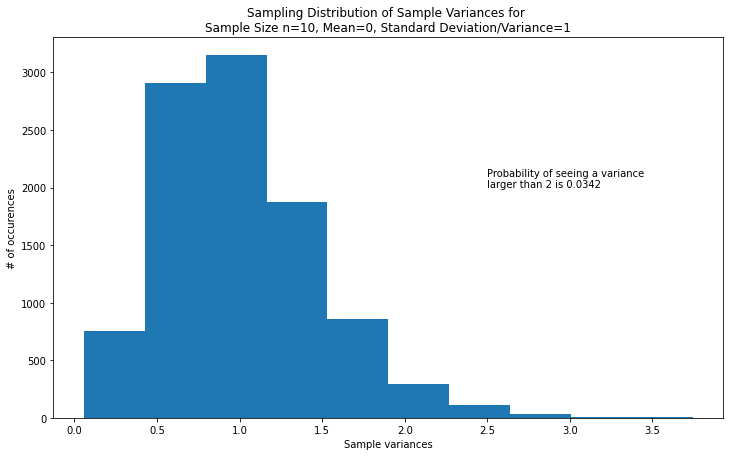

In [55]:
# Create a histogram of the sample variances
plt.figure(figsize=(12,7))
plt.hist(variance_array)
plt.text(
    x=2.5,
    y=2000,
    # Approximate the probability of observing a sample with variance larger than 2
    s = "Probability of seeing a variance \nlarger than 2 is " + str(round(np.mean(np.array(variance_array)>2), 4))
)
plt.xlabel("Sample variances")
plt.ylabel("# of occurences")
plt.title("Sampling Distribution of Sample Variances for \nSample Size n=10, Mean=0, Standard Deviation/Variance=1")

2b: Repeat the above process (and histogram/probability calculation) with a sample size of $30$.

In [61]:
# Set seed for repeatability
np.random.seed(5)

# Initialize empty list to store variances
variance_array = []

# Repeat 10,000 times
for i in range(0, 10000):
    # Generate a sample size of 30 from a standard normal distribution
    # The location (loc) keyword specifies the mean, the scale (scale) keyword specifies the standard deviation
    norm_sample = stats.norm.rvs(loc=0, scale=1, size=30)
    # Compute the variance using numpy
    sample_variance = np.var(norm_sample, ddof=1)
    # Append variance to our list
    variance_array.append(sample_variance)

Text(0.5, 1.0, 'Sampling Distribution of Sample Variances for \nSample Size n=10, Mean=0, Standard Deviation/Variance=1')

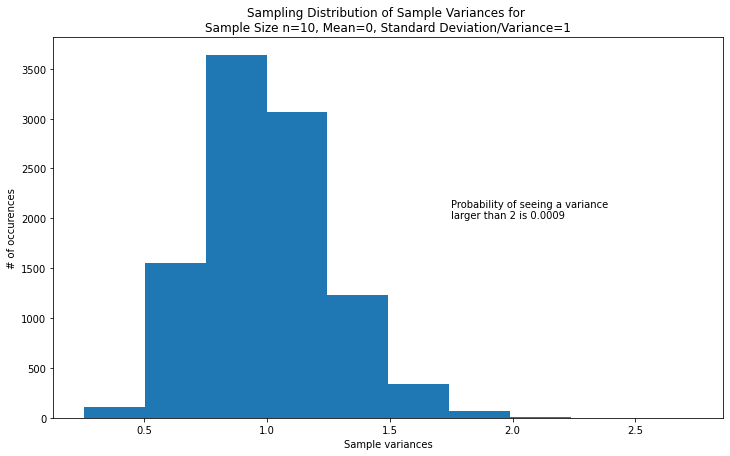

In [62]:
plt.figure(figsize=(12,7))
plt.hist(variance_array)
plt.text(
    x=1.75,
    y=2000,
    # Approximate the probability of observing a sample with variance larger than 2
    s = "Probability of seeing a variance \nlarger than 2 is " + str(round(np.mean(np.array(variance_array)>2), 4))
)
plt.xlabel("Sample variances")
plt.ylabel("# of occurences")
plt.title("Sampling Distribution of Sample Variances for \nSample Size n=10, Mean=0, Standard Deviation/Variance=1")

3: > If you have a terabyte of data, you are working on big data.

Most modern file systems and operating systems can handle a terabyte of data (see, for instance, [tested values for GFS2 and XFS](https://access.redhat.com/solutions/1532)), and high-end servers (e.g. Cisco's [UCS-B servers](https://www.cisco.com/c/en/us/products/servers-unified-computing/ucs-b-series-blade-servers/index.html)) can support more than 9 terabytes of RAM. Thus, since a terabyte of data can fit on a single server and would not necessarily require us to learn new tools to process it, I would _disagree_ that a terabyte of data in 2022 constitutes "big data".   


4: The "RDBMS" acronym stands for "relational database management system(s)". Relational databases contain 2-dimensional tables that are linked by keys, and relational database management systems such as Azure SQL, MySQL, SQL Server, etc. are systems that hold those databases, provide APIs for manipulating those databases, and provide security controls for accessing the databases.

## Part II - Querying a database

1: Connect to the database and then look at all of the tables in the database (use `read_sql()` from pandas to have this returned as a data frame).

In [8]:
# Connect to the lahman.db database
import sqlite3

con = sqlite3.connect("lahman2016.db")

In [9]:
# Look at all of the tables in the database.
# Use read_sql() from pandas to have this returned as a data frame.
import pandas as pd

pd.read_sql("SELECT name FROM sqlite_schema WHERE type = 'table'", con)

,name
0,AllstarFull
1,Appearances
2,AwardsManagers
3,AwardsPlayers
4,AwardsShareManagers
5,AwardsSharePlayers
6,Batting
7,BattingPost
8,CollegePlaying
9,Fielding


2: Write an SQL query that returns all the teams that played in the year 2015 with all of the corresponding columns from the _Teams_ table. Turn the result into a data frame (either by using pandas or by using sqlite3 and then converting it to a data frame).

In [10]:
# Write an SQL query that returns all the teams that played in the year 2015 
# with all of the corresponding columns (*) from the Teams table. 
# Turn the result into a data frame by using pandas.
pd.read_sql("SELECT * FROM Teams WHERE YearID = 2015", con)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET
5,2015,AL,HOU,HOU,W,2,162,81,86,76,...,131,0.986,Houston Astros,Minute Maid Park,2153585,97,99,HOU,HOU,HOU
6,2015,AL,KCA,KCR,C,1,162,81,95,67,...,138,0.985,Kansas City Royals,Kauffman Stadium,2708549,104,103,KCR,KCA,KCA
7,2015,AL,LAA,ANA,W,3,162,81,85,77,...,108,0.984,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,3012765,94,95,LAA,ANA,ANA
8,2015,AL,MIN,MIN,C,2,162,81,83,79,...,150,0.986,Minnesota Twins,Target Field,2220054,103,104,MIN,MIN,MIN
9,2015,AL,NYA,NYY,E,2,162,81,87,75,...,135,0.985,New York Yankees,Yankee Stadium III,3193795,99,101,NYY,NYA,NYA


3: Write an SQL query that returns all of the players in the hall of fame, the year they were voted into the hall of fame, and their category - see the _HallOfFame_ table, the inducted variable is important here. Turn the result into a data frame (either by using pandas or by using sqlite3 and then converting it to a data frame).

In [11]:
# Write an SQL query that returns all of the players in the hall of fame, 
# the year they were voted into the hall of fame, and their category - see the HallOfFame table, the inducted variable is important here. 
# Turn the result into a data frame (either by using pandas or by using sqlite3 and then converting it to a data frame).
pd.read_sql("SELECT playerID, yearID, category FROM HallOfFame WHERE inducted = 'Y'", con)

,playerID,yearid,category
0,aaronha01,1982,Player
1,alexape01,1938,Player
2,alomaro01,2011,Player
3,alstowa01,1983,Manager
4,andersp01,2000,Manager
...,...,...,...
312,yastrca01,1989,Player
313,yawketo99,1980,Pioneer/Executive
314,youngcy01,1937,Player
315,youngro01,1972,Player


4: Write an SQL query that return all unique managers of the Pittsburgh Pirates (teamID of PIT) and only that information from the _Managers_ table. Turn the result into a data frame (either by using pandas or by using sqlite3 and then converting it to a data frame). Hint: Check out SELECT DISTINCT

In [65]:
# Write an SQL query that return all unique managers of the Pittsburgh Pirates (teamID of PIT) 
# and only that information from the Managers table. 
pd.read_sql("SELECT DISTINCT playerID FROM Managers WHERE teamID = 'PIT'", con)

,playerID
0,bezdehu99
1,bragabo01
2,buckeal99
3,burnsto01
4,burwebi01
5,bushdo01
6,callani01
7,clarkfr01
8,davissp01
9,donovpa01


5: Use SQL code and the _HallOfFame_ and _Managers_ tables to return all of the playerIDs for the people that managed for a team that were inducted into the hall of fame. Also, programmatically report the number of such people - this can be done in pandas after returning the data.

In [13]:
# Use SQL code and the HallOfFame and Managers tables to 
# return all of the playerIDs for the people that managed for a team that were inducted into the hall of fame. 
hof_managers = pd.merge(left = pd.read_sql("SELECT playerID FROM Managers WHERE plyrMgr = 'Y'", con), 
                        right = pd.read_sql("SELECT playerID FROM HallOfFame WHERE inducted = 'Y'", con),
         how = "inner", 
         on = "playerID")
hof_managers

,playerID
0,wrighha01
1,wrighha01
2,wrighha01
3,wrighha01
4,wrighha01
...,...
280,dickebi01
281,hermabi01
282,robinfr02
283,robinfr02


There were 285 such people.

In [14]:
# Also, programmatically report the number of such people - this can be done in pandas after returning the data.
hof_managers.count()

playerID    285
dtype: int64

6: Now use the same two tables and an SQL query to return every season managed by each manager that made it to the hall of fame. You should return the playerID (manager ID), G, W, and L columns from the Managers table. Second, determine the overall win/loss records (sum of wins and sum of losses) for each of these hall of fame managers. Third, create a new variable that is the win/loss percentage (W/(W+L)). Lastly, sort the resulting data by the win/loss percentage variable (from largest to smallest). The last three parts can be done in pandas with the returned data or you can do it via SQL if you’d like.

In [69]:
# Now use the same two tables and an SQL query to 
# return every season managed by each manager that made it to the hall of fame.
# Return the playerID (manager ID), G, W, and L columns from the Managers table.
hof_manager_seasons = pd.merge(left = pd.read_sql("SELECT playerID, G, W, L FROM Managers WHERE plyrMgr = 'Y'", con), 
                        right = pd.read_sql("SELECT playerID FROM HallOfFame WHERE inducted = 'Y'", con),
         how = "inner", 
         on = "playerID")
hof_manager_seasons 

,playerID,G,W,L
0,wrighha01,31,20,10
1,wrighha01,48,39,8
2,wrighha01,60,43,16
3,wrighha01,71,52,18
4,wrighha01,82,71,8
...,...,...,...,...
280,dickebi01,105,57,48
281,hermabi01,155,61,92
282,robinfr02,159,79,80
283,robinfr02,159,81,78


In [73]:
# Second, determine the overall win/loss records (sum of wins and sum of losses) 
# for each of these hall of fame managers.
# reset_index() function prevents playerID from becoming part of the index.
manager_win_loss = hof_manager_seasons.groupby("playerID").sum().reset_index()
manager_win_loss

,playerID,G,W,L
0,ansonca01,2266,1287,934
1,bancrda01,615,249,363
2,bottoji01,78,21,56
3,boudrlo01,1543,804,727
4,bresnro01,775,328,432
...,...,...,...,...
58,wardjo01,751,412,320
59,whitede01,20,9,11
60,wrighge01,85,59,25
61,wrighha01,423,306,109


In [17]:
# Third, create a new variable that is the win/loss percentage (W/(W+L)).
manager_win_loss["win_loss_perc"] = manager_win_loss["W"]/(manager_win_loss["W"]+manager_win_loss["L"])
manager_win_loss

,G,W,L,win_loss_perc
playerID,,,,
ansonca01,2266,1287,934,0.579469
bancrda01,615,249,363,0.406863
bottoji01,78,21,56,0.272727
boudrlo01,1543,804,727,0.525147
bresnro01,775,328,432,0.431579
...,...,...,...,...
wardjo01,751,412,320,0.562842
whitede01,20,9,11,0.450000
wrighge01,85,59,25,0.702381


In [18]:
# Lastly, sort the resulting data by the win/loss percentage variable (from largest to smallest).
manager_win_loss.sort_values(by="win_loss_perc", ascending=False)

,G,W,L,win_loss_perc
playerID,,,,
wrighha01,423,306,109,0.737349
wrighge01,85,59,25,0.702381
spaldal01,126,78,47,0.624000
chancfr01,1468,885,557,0.613731
comisch01,1410,840,541,0.608255
...,...,...,...,...
robinwi01,83,24,57,0.296296
galvipu01,24,7,17,0.291667
bottoji01,78,21,56,0.272727


7: Using SQL, construct a table of hall of fame pitchers (any hall of famer that pitched) that gives the playerID and their total
(sum) for GS, G, W, L, IPOuts, CG, SHO, and SV columns. The summing can be done in pandas.

In [75]:
# Using SQL, construct a table of hall of fame pitchers (any hall of famer that pitched) that 
# gives the playerID and their GS, G, W, L, IPOuts, CG, SHO, and SV.
hof_pitchers = pd.merge(left = pd.read_sql("SELECT playerID, GS, G, W, L, IPOuts, CG, SHO, SV FROM Pitching", con), 
                        right = pd.read_sql("SELECT playerID FROM HallOfFame WHERE inducted = 'Y'", con),
         how = "inner", 
         on = "playerID")

# Calculate sums of GS, G, W, L, IPOuts, CG, SHO, and SV.
# reset_index() function prevents playerID from becoming part of the index.
pitching_sum = hof_pitchers.groupby("playerID").sum().reset_index()
pitching_sum

,playerID,GS,G,W,L,IPouts,CG,SHO,SV
0,alexape01,599,696,373,208,15570,437,90,32
1,ansonca01,0,3,0,1,12,0,0,1
2,becklja01,1,1,0,1,12,0,0,0
3,bendech01,334,459,212,127,9051,255,40,34
4,blylebe01,685,692,287,250,14910,242,60,0
...,...,...,...,...,...,...,...,...,...
96,willivi01,471,513,249,205,11988,388,50,11
97,wrighge01,0,3,0,1,15,0,0,0
98,wrighha01,7,34,4,4,298,0,0,8
99,wynnea01,612,691,300,244,13692,290,49,15


8: For all of the hall of fame pitchers, use SQL to create a table of their batting statistics. Namely, the playerID and their total (sum) for AB, R, H, HR, RBI, BB, and SO. The summing can be done in pandas.

In [78]:
# For all of the hall of fame pitchers, use SQL to create a table of their batting statistics. 
batting_stats = pd.merge(left=pitching_sum["playerID"],
                         right = pd.read_sql("SELECT playerID, AB, R, H, HR, RBI, BB, SO FROM Batting", con),
         how = "left", 
         on = "playerID")

# Calculate sums for AB, R, H, HR, RBI, BB, and SO.
summed_batting_stats = batting_stats.groupby("playerID").sum().reset_index()
summed_batting_stats

,playerID,AB,R,H,HR,RBI,BB,SO
0,alexape01,1810,154,378,11,163.0,77,276.0
1,ansonca01,10277,1996,3418,97,2076.0,983,302.0
2,becklja01,9526,1600,2930,86,1575.0,616,270.0
3,bendech01,1147,102,243,6,116.0,75,48.0
4,blylebe01,451,19,59,0,25.0,5,193.0
...,...,...,...,...,...,...,...,...
96,willivi01,1493,107,248,1,84.0,81,8.0
97,wrighge01,2875,665,867,11,330.0,67,119.0
98,wrighha01,816,183,222,4,111.0,36,12.0
99,wynnea01,1704,136,365,17,173.0,141,330.0


9: Use pandas to join the previous two tables together by pitcher.

In [79]:
joined_pitcher = pd.merge(left=pitching_sum,
                          right=summed_batting_stats,
                          how = "inner",
                          on = "playerID")
joined_pitcher

,playerID,GS,G,W,L,IPouts,CG,SHO,SV,AB,R,H,HR,RBI,BB,SO
0,alexape01,599,696,373,208,15570,437,90,32,1810,154,378,11,163.0,77,276.0
1,ansonca01,0,3,0,1,12,0,0,1,10277,1996,3418,97,2076.0,983,302.0
2,becklja01,1,1,0,1,12,0,0,0,9526,1600,2930,86,1575.0,616,270.0
3,bendech01,334,459,212,127,9051,255,40,34,1147,102,243,6,116.0,75,48.0
4,blylebe01,685,692,287,250,14910,242,60,0,451,19,59,0,25.0,5,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,willivi01,471,513,249,205,11988,388,50,11,1493,107,248,1,84.0,81,8.0
97,wrighge01,0,3,0,1,15,0,0,0,2875,665,867,11,330.0,67,119.0
98,wrighha01,7,34,4,4,298,0,0,8,816,183,222,4,111.0,36,12.0
99,wynnea01,612,691,300,244,13692,290,49,15,1704,136,365,17,173.0,141,330.0
